In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
import random

11490434/11490434 [==============================] - 0s 0us/step


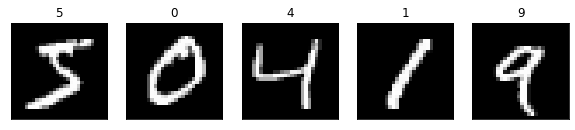

In [2]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False,
			 sharey=True, figsize=(10, 4))
for i in range(5):
	axes[i].set_title(y_train[i])
	axes[i].imshow(X_train[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

In [3]:
# Convert y_train into one-hot format 
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)

# Convert y_test into one-hot format 
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

# Train the Neural Network model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

predictions = model.predict(X_test)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1967 - acc: 0.6726 - val_loss: 0.8007 - val_acc: 0.8000
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7250 - acc: 0.7968 - val_loss: 0.6174 - val_acc: 0.8254
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6045 - acc: 0.8286 - val_loss: 0.5785 - val_acc: 0.8340
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5764 - acc: 0.8314 - val_loss: 0.5710 - val_acc: 0.8285
Epoch 5/5
313/313 [==============================] - 1s 1ms/step


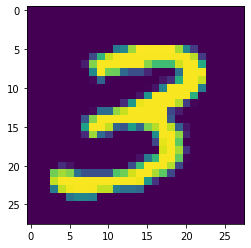

The prediction is : 3


In [13]:
index = random.randint(0, len(X_test))
plt.imshow(X_test[index])
plt.show()
print(f"The prediction is : {np.argmax(predictions[index])}")